<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab08_supermaket_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

In [25]:
df=pd.read_excel('Sample - Superstore.xls',index_col='Row ID')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [27]:
df.loc[:,['Order Date','Category','Sales']]

,Order Date,Category,Sales
Row ID,,,
1,2016-11-08,Furniture,261.9600
2,2016-11-08,Furniture,731.9400
3,2016-06-12,Office Supplies,14.6200
4,2015-10-11,Furniture,957.5775
5,2015-10-11,Office Supplies,22.3680
...,...,...,...
9990,2014-01-21,Furniture,25.2480
9991,2017-02-26,Furniture,91.9600
9992,2017-02-26,Technology,258.5760


In [35]:
df=df.pivot_table(values='Sales',index=['Category','Order Date'],aggfunc='sum')

In [38]:
df.to_excel('test.xlsx')

In [36]:
df

Sales
Category   Order Date          
Furniture  2014-01-06  2573.820
           2014-01-07    76.728
           2014-01-10    51.940
           2014-01-11     9.940
           2014-01-13   879.939
...                         ...
Technology 2017-12-25   401.208
           2017-12-27   164.388
           2017-12-28    14.850
           2017-12-29   302.376
           2017-12-30    90.930

[2861 rows x 1 columns]

In [70]:
furniture=df.loc['Furniture'].resample('MS').sum()

In [71]:
furniture.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


# 이동 평균

In [72]:
furniture

,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


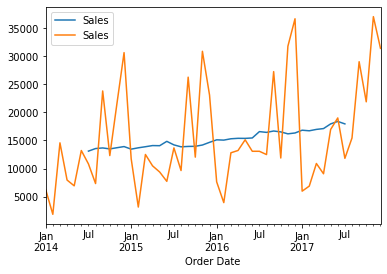

In [79]:
fig,ax=plt.subplots()
furniture.rolling(12,center=True).mean().plot(ax=ax)
furniture.plot(ax=ax)
ax.show()

# 시계열 분해

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
model=seasonal_decompose(furniture)

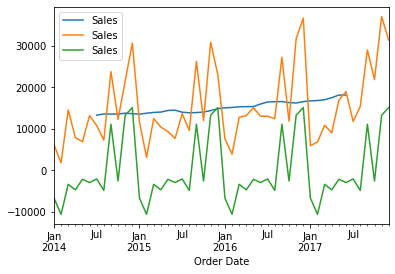

In [91]:
fig,ax=plt.subplots()
model.trend.plot(ax=ax)
furniture.plot(ax=ax)
model.seasonal.plot(ax=ax)

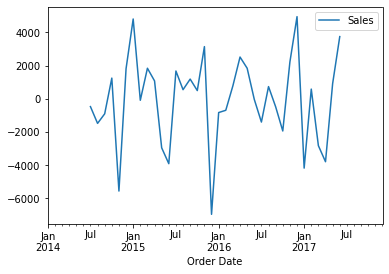

In [90]:
model.resid.plot()

# 예측 모델

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [106]:
model=ARIMA(furniture,order=(1,1,0))

In [107]:
fit=model.fit()

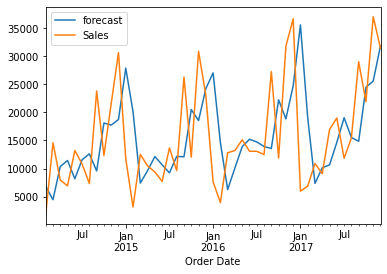

In [108]:
fit.plot_predict()
plt.show()

In [113]:
fit.forecast(steps=12)

# 예측모델 끝판왕

In [114]:
from fbprophet import Prophet

In [115]:
furniture

,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


# column이 무조건 2개 있어야함

In [116]:
furniture=furniture.reset_index().rename(columns={'Order Date':'ds','Sales':'y'})

In [118]:
furniture.head()

,ds,y
0,2014-01-01,6242.525
1,2014-02-01,1839.658
2,2014-03-01,14573.956
3,2014-04-01,7944.837
4,2014-05-01,6912.787


In [120]:
model=Prophet()
model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
model.predict()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,12299.085085,1438.317394,7911.592599,12299.085085,12299.085085,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,0.0,0.0,0.0,4573.105255
1,2014-02-01,12437.274304,-1438.054262,4792.795550,12437.274304,12437.274304,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,0.0,0.0,0.0,1597.978335
2,2014-03-01,12562.090374,7893.362286,14074.786798,12562.090374,12562.090374,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,0.0,0.0,0.0,10942.480794
3,2014-04-01,12700.279594,4718.928948,10965.025924,12700.279594,12700.279594,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,0.0,0.0,0.0,7816.625874
4,2014-05-01,12834.011097,5740.879450,11598.009528,12834.011097,12834.011097,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,0.0,0.0,0.0,8844.914064
5,2014-06-01,12972.200317,7251.030086,13345.781150,12972.200317,12972.200317,-2693.370216,-2693.370216,-2693.370216,-2693.370216,-2693.370216,-2693.370216,0.0,0.0,0.0,10278.830101
6,2014-07-01,13105.931821,7424.758567,13650.762674,13105.931821,13105.931821,-2537.941457,-2537.941457,-2537.941457,-2537.941457,-2537.941457,-2537.941457,0.0,0.0,0.0,10567.990364
7,2014-08-01,13244.121042,5395.989872,11917.325842,13244.121042,13244.121042,-4600.719925,-4600.719925,-4600.719925,-4600.719925,-4600.719925,-4600.719925,0.0,0.0,0.0,8643.401117
8,2014-09-01,13382.310264,21468.055782,27500.585330,13382.310264,13382.310264,11121.345567,11121.345567,11121.345567,11121.345567,11121.345567,11121.345567,0.0,0.0,0.0,24503.655831
9,2014-10-01,13516.041769,9152.140876,15483.983904,13516.041769,13516.041769,-1102.589113,-1102.589113,-1102.589113,-1102.589113,-1102.589113,-1102.589113,0.0,0.0,0.0,12413.452655


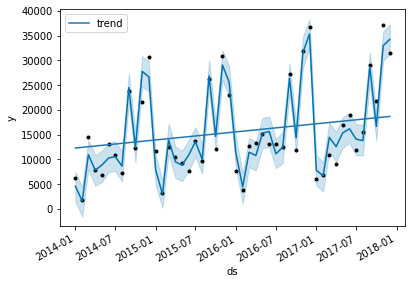

In [131]:
fig,ax=plt.subplots()
model.plot(model.predict(),ax=ax)
model.predict().plot('ds','trend',ax=ax)
plt.show()

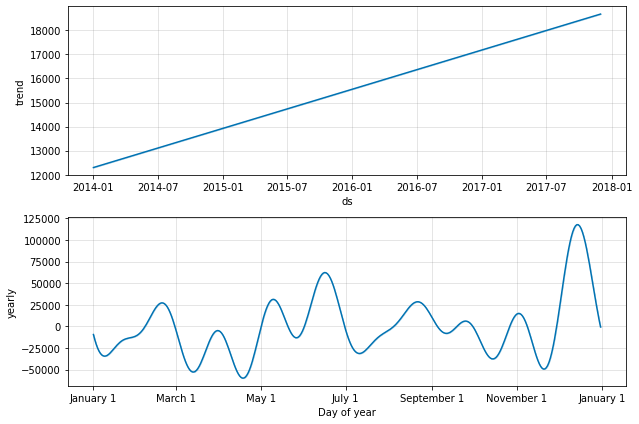

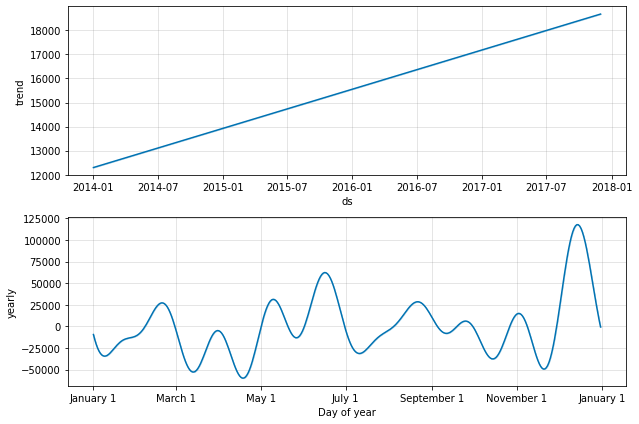

In [132]:
model.plot_components(model.predict())

In [135]:
model.predict()
future=model.make_future_dataframe(24,freq='M')
future.tail(5)

,ds
67,2019-07-31
68,2019-08-31
69,2019-09-30
70,2019-10-31
71,2019-11-30


In [136]:
model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,12299.085085,1781.709355,7616.660209,12299.085085,12299.085085,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,0.0,0.0,0.0,4573.105255
1,2014-02-01,12437.274304,-1567.061412,4677.268937,12437.274304,12437.274304,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,0.0,0.0,0.0,1597.978335
2,2014-03-01,12562.090374,8277.032661,13810.507453,12562.090374,12562.090374,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,0.0,0.0,0.0,10942.480794
3,2014-04-01,12700.279594,4733.880810,10897.570151,12700.279594,12700.279594,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,0.0,0.0,0.0,7816.625874
4,2014-05-01,12834.011097,5693.346852,12031.230624,12834.011097,12834.011097,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,0.0,0.0,0.0,8844.914064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-07-31,21382.352714,12426.691377,18558.905975,21382.174609,21382.535307,-5858.265214,-5858.265214,-5858.265214,-5858.265214,-5858.265214,-5858.265214,0.0,0.0,0.0,15524.087500
68,2019-08-31,21520.611521,33119.868631,39381.842550,21520.422427,21520.810288,14615.201930,14615.201930,14615.201930,14615.201930,14615.201930,14615.201930,0.0,0.0,0.0,36135.813451
69,2019-09-30,21654.410366,20579.697211,26468.007248,21654.207148,21654.623715,1753.153118,1753.153118,1753.153118,1753.153118,1753.153118,1753.153118,0.0,0.0,0.0,23407.563484
70,2019-10-31,21792.669173,30627.098688,36631.903235,21792.450809,21792.897200,11942.119871,11942.119871,11942.119871,11942.119871,11942.119871,11942.119871,0.0,0.0,0.0,33734.789044


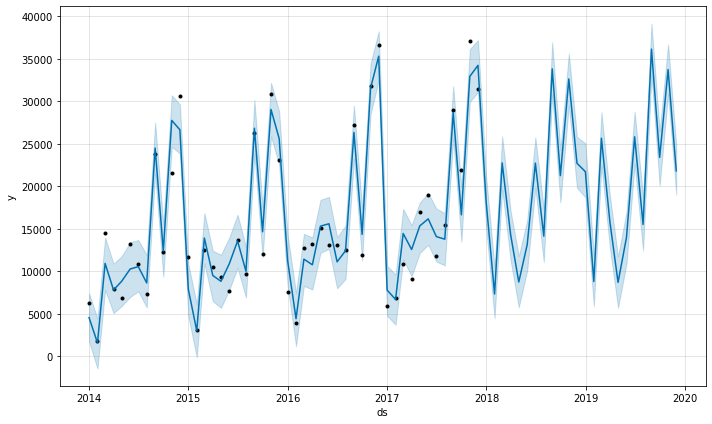

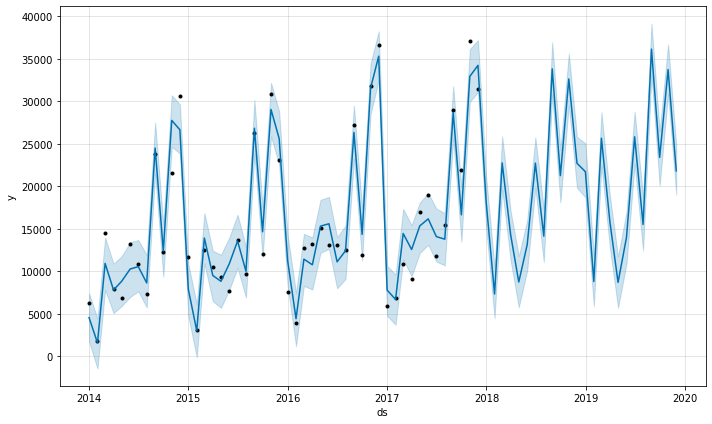

In [137]:
model.plot(model.predict(future))

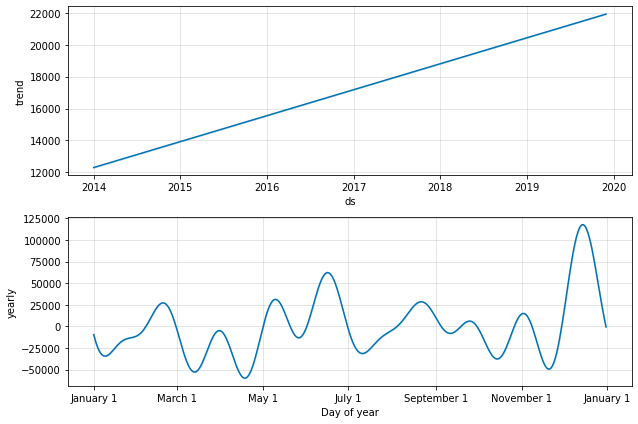

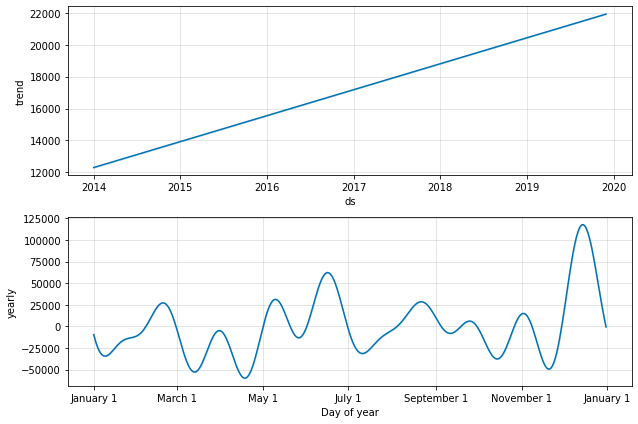

In [138]:
model.plot_components(model.predict(future))